# Hyperparameter Database Project


## Abstract

This project aims to create database consisting of hyperparameters for all models generated for a particular runtime for a dataset. Here we are making use of H20 AutoML library which generates models for each runtime and gets all hyperparameters for each model.

### Aim/Purpose of Research
This project aims to create database consisting of hyperparameters for all models generated for a particular runtime for a dataset. Here we are making use of H20 AutoML library which generates models for each runtime and gets all hyperparameters for each model.


### Methods Used :

Exploratory Data Analysis, H20 library. 

### About the dataset

Dataset has been taken from Kaggle : Travel Insurance Claims. This dataset displays information about the travel insurance claims filed by the candidate. 

#### Number of records: 
63,327 

#### Number of attributes:
11

#### Type of problem: 
Binary classification, regression

#### Type of variables:
Numeric, date, categorical , binary.

#### Target attribute:
Claim

In [63]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,7 hours 18 mins
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.1
H2O cluster version age:,"21 days, 2 hours and 47 minutes"
H2O cluster name:,H2O_from_python_Ashmita_fou07q
H2O cluster total nodes:,1
H2O cluster free memory:,3.516 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [64]:
# importing libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from pylab import rcParams
from scipy.stats import spearmanr
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, make_scorer

In [65]:
# importing the dataset
df=pd.read_csv("travel insurance.csv", decimal = ',')

In [66]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.7,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [67]:
df.describe()

,Duration,Age
count,63326.000000,63326.000000
mean,49.317074,39.969981
std,101.791566,14.017010
min,-2.000000,0.000000
25%,9.000000,35.000000
50%,22.000000,36.000000
75%,53.000000,43.000000
max,4881.000000,118.000000


In [68]:
df.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age'],
      dtype='object')

In [69]:
df.info
df.shape

(63326, 11)

In [70]:
df.dtypes

Agency                  object
Agency Type             object
Distribution Channel    object
Product Name            object
Claim                   object
Duration                 int64
Destination             object
Net Sales               object
Commision (in value)    object
Gender                  object
Age                      int64
dtype: object

In [71]:
# Checking for null values
df.isnull().values.any()

True

In [72]:
df.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

In [73]:
df.isnull().sum().sum()


45107

In [74]:
df = df.drop(['Gender'], axis=1)

In [75]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29,9.57,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29,9.57,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.7,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,41


In [76]:
df.corr()

,Duration,Age
Duration,1.000000,0.002468
Age,0.002468,1.000000


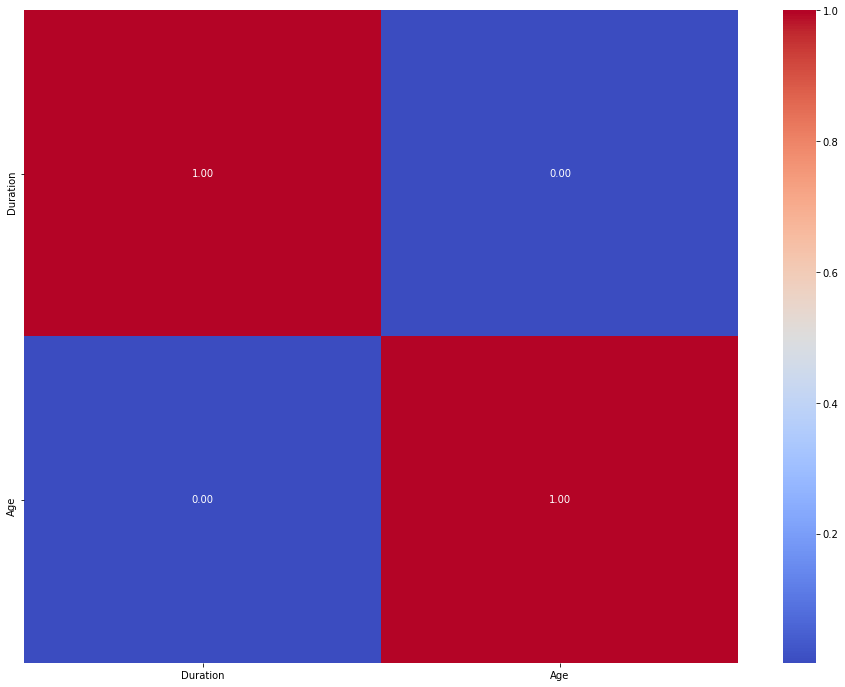

In [77]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [78]:
#one hot encode
agency={"Agency Type":{"Travel Agency":1,"Airlines":2}}
df.replace(agency, inplace=True)
df.head(10)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,CBH,1,Offline,Comprehensive Plan,No,186,MALAYSIA,-29,9.57,81
1,CBH,1,Offline,Comprehensive Plan,No,186,MALAYSIA,-29,9.57,71
2,CWT,1,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.7,32
3,CWT,1,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,32
4,CWT,1,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,41
5,JZI,2,Online,Value Plan,No,66,UNITED STATES,-121,42.35,44
6,CWT,1,Online,Rental Vehicle Excess Insurance,No,47,UNITED STATES,-39.6,23.76,32
7,CWT,1,Online,Rental Vehicle Excess Insurance,No,63,AUSTRALIA,-108.9,65.34,29
8,CWT,1,Online,Rental Vehicle Excess Insurance,No,57,THAILAND,-19.8,11.88,44
9,CWT,1,Online,Rental Vehicle Excess Insurance,No,186,AUSTRALIA,-99,59.4,37


In [79]:
#one hot encode
distribution_channel={"Distribution Channel ":{"Offline":1,"Online":2}}
df.replace(distribution_channel, inplace=True)
df.head(10)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,CBH,1,Offline,Comprehensive Plan,No,186,MALAYSIA,-29,9.57,81
1,CBH,1,Offline,Comprehensive Plan,No,186,MALAYSIA,-29,9.57,71
2,CWT,1,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.7,32
3,CWT,1,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,32
4,CWT,1,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,41
5,JZI,2,Online,Value Plan,No,66,UNITED STATES,-121,42.35,44
6,CWT,1,Online,Rental Vehicle Excess Insurance,No,47,UNITED STATES,-39.6,23.76,32
7,CWT,1,Online,Rental Vehicle Excess Insurance,No,63,AUSTRALIA,-108.9,65.34,29
8,CWT,1,Online,Rental Vehicle Excess Insurance,No,57,THAILAND,-19.8,11.88,44
9,CWT,1,Online,Rental Vehicle Excess Insurance,No,186,AUSTRALIA,-99,59.4,37


In [80]:
#one hot encode
gender={"Gender ":{"F":1,"M":2, np.nan:3}}
df.replace(gender, inplace=True)
df.head(10)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,CBH,1,Offline,Comprehensive Plan,No,186,MALAYSIA,-29,9.57,81
1,CBH,1,Offline,Comprehensive Plan,No,186,MALAYSIA,-29,9.57,71
2,CWT,1,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.7,32
3,CWT,1,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,32
4,CWT,1,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,41
5,JZI,2,Online,Value Plan,No,66,UNITED STATES,-121,42.35,44
6,CWT,1,Online,Rental Vehicle Excess Insurance,No,47,UNITED STATES,-39.6,23.76,32
7,CWT,1,Online,Rental Vehicle Excess Insurance,No,63,AUSTRALIA,-108.9,65.34,29
8,CWT,1,Online,Rental Vehicle Excess Insurance,No,57,THAILAND,-19.8,11.88,44
9,CWT,1,Online,Rental Vehicle Excess Insurance,No,186,AUSTRALIA,-99,59.4,37


In [81]:
df['Agency'] = pd.DataFrame(df['Agency'])
df['Agency']=df['Agency'].astype("category").cat.codes
df['Agency'].head(10)

0    3
1    3
2    6
3    6
4    6
5    9
6    6
7    6
8    6
9    6
Name: Agency, dtype: int8

In [82]:
df['Product Name'] = pd.DataFrame(df['Product Name'])
df['Product Name']=df['Product Name'].astype("category").cat.codes
df['Product Name'].head(10)

0    12
1    12
2    16
3    16
4    16
5    25
6    16
7    16
8    16
9    16
Name: Product Name, dtype: int8

In [83]:
df['Destination'] = pd.DataFrame(df['Destination'])
df['Destination']=df['Destination'].astype("category").cat.codes
df['Destination'].head(10)

0     79
1     79
2      4
3      4
4     61
5    140
6    140
7      4
8    129
9      4
Name: Destination, dtype: int16

In [84]:
df.head(10)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,3,1,Offline,12,No,186,79,-29,9.57,81
1,3,1,Offline,12,No,186,79,-29,9.57,71
2,6,1,Online,16,No,65,4,-49.5,29.7,32
3,6,1,Online,16,No,60,4,-39.6,23.76,32
4,6,1,Online,16,No,79,61,-19.8,11.88,41
5,9,2,Online,25,No,66,140,-121,42.35,44
6,6,1,Online,16,No,47,140,-39.6,23.76,32
7,6,1,Online,16,No,63,4,-108.9,65.34,29
8,6,1,Online,16,No,57,129,-19.8,11.88,44
9,6,1,Online,16,No,186,4,-99,59.4,37


In [85]:
df.corr()

,Agency,Agency Type,Product Name,Duration,Destination,Age
Agency,1.000000,-0.207529,0.138890,-0.076735,-0.208348,0.126357
Agency Type,-0.207529,1.000000,0.272308,0.111588,0.150909,0.221503
Product Name,0.138890,0.272308,1.000000,-0.048609,-0.069257,0.273164
Duration,-0.076735,0.111588,-0.048609,1.000000,0.074720,0.002468
Destination,-0.208348,0.150909,-0.069257,0.074720,1.000000,-0.041579
Age,0.126357,0.221503,0.273164,0.002468,-0.041579,1.000000


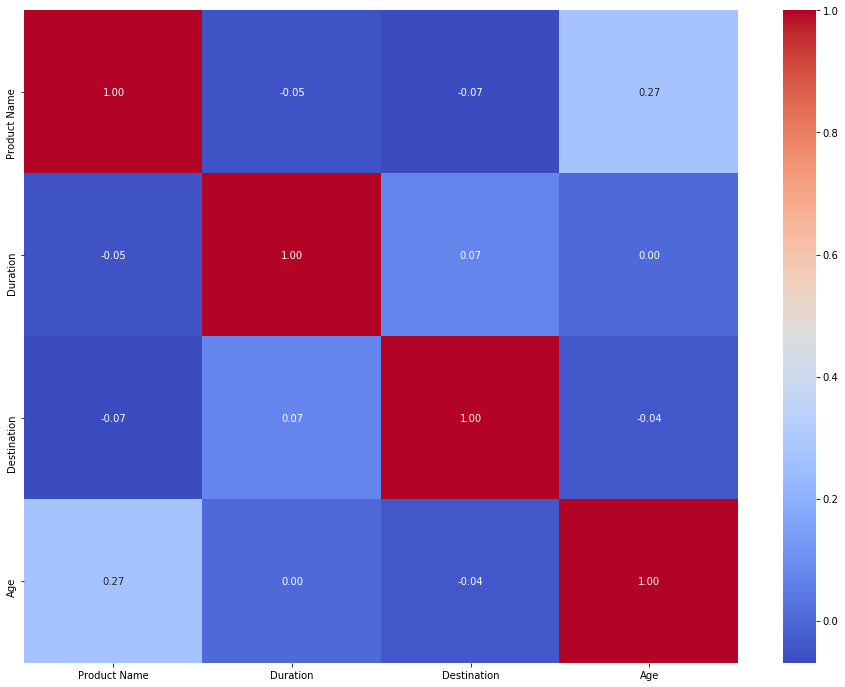

In [86]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

### H20

In [92]:
data_path=None
all_variables=None
test_path=None
# target='search_term'
target='Claim'
nthreads=1 
min_mem_size=6 
run_time=500
classification=False
scale=False
max_models=9    
model_path=None
balance_y=False 
balance_threshold=0.2
name=None 
server_path=None  
analysis=0

def alphabet(n):
  alpha='0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'    
  str=''
  r=len(alpha)-1   
  while len(str)<n:
    i=random.randint(0,r)
    str+=alpha[i]   
  return str

run_id=alphabet(9)
if server_path==None:
  server_path=os.path.abspath(os.curdir)
os.chdir(server_path) 
run_dir = os.path.join(server_path,run_id)
os.mkdir(run_dir)
os.chdir(run_dir)    

# run_id to std out
print (run_id)

wtiOmXHNa


In [93]:
logfile=run_id+'_autoh2o_log.zip'
logs_path=os.path.join(run_dir,'logs')
print(logs_path,' ',logfile)

C:\Users\Ashmita\Desktop\Data Science Assignments\Final Project\n657f88e2\wtiOmXHNa\logs   wtiOmXHNa_autoh2o_log.zip


In [155]:
def set_meta_data(analysis,run_id,server,data,test,model_path,target,run_time,classification,scale,model,balance,balance_threshold,name,path,nthreads,min_mem_size):
  meta_data={}
  meta_data['start_time'] = time.time()
  meta_data['target']=target
  meta_data['server_path']=server
  meta_data['data_path']=data 
  meta_data['test_path']=test
  meta_data['max_models']=model
  meta_data['run_time']=run_time
  meta_data['run_id'] =run_id
  meta_data['scale']=scale
  meta_data['classification']=classification
  meta_data['scale']=False
  meta_data['model_path']=model_path
  meta_data['balance']=balance
  meta_data['balance_threshold']=balance_threshold
  meta_data['project'] =name
  meta_data['end_time'] = time.time()
  meta_data['execution_time'] = 0.0
  meta_data['run_path'] =path
  meta_data['nthreads'] = nthreads
  meta_data['min_mem_size'] = min_mem_size
  meta_data['analysis'] = analysis
  return meta_data

In [156]:
metadata = set_meta_data(analysis, run_id,server_path,data_path,test_path,model_path,target,run_time,classification,scale,max_models,balance_y,balance_threshold,name,run_dir,nthreads,min_mem_size)
print(metadata)

{'start_time': 1555918563.508581, 'target': 'Claim', 'server_path': 'C:\\Users\\Ashmita\\Desktop\\Data Science Assignments\\Final Project\\n657f88e2', 'data_path': 'train.csv', 'test_path': None, 'max_models': 9, 'run_time': 500, 'run_id': 'wtiOmXHNa', 'scale': False, 'classification': False, 'model_path': None, 'balance': False, 'balance_threshold': 0.2, 'project': 'Claim_hyperparameters.json', 'end_time': 1555918563.508581, 'execution_time': 0.0, 'run_path': 'C:\\Users\\Ashmita\\Desktop\\Data Science Assignments\\Final Project\\n657f88e2\\wtiOmXHNa', 'nthreads': 1, 'min_mem_size': 3, 'analysis': 0}


In [176]:
generate_md = pd.DataFrame.from_dict(metadata , orient='index')
generate_md

,0
start_time,1.55592e+09
target,Claim
server_path,C:\Users\Ashmita\Desktop\Data Science Assignme...
data_path,train.csv
test_path,None
max_models,9
run_time,500
run_id,wtiOmXHNa
scale,False
classification,False


In [177]:
#dict_to_json(generate_md,n)
generate_md.to_csv('metadata_500.csv')

In [96]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

3


In [97]:
# 65535 Highest port no
port_no=random.randint(5555,55555)
h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no)

Checking whether there is an H2O instance running at http://localhost:48515 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 24.80-b11, mixed mode)
  Starting server from C:\Users\Ashmita\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Ashmita\AppData\Local\Temp\tmp6f3qgey7
  JVM stdout: C:\Users\Ashmita\AppData\Local\Temp\tmp6f3qgey7\h2o_Ashmita_started_from_python.out
  JVM stderr: C:\Users\Ashmita\AppData\Local\Temp\tmp6f3qgey7\h2o_Ashmita_started_from_python.err
  Server is running at http://127.0.0.1:48515
Connecting to H2O server at http://127.0.0.1:48515 ... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.1
H2O cluster version age:,"21 days, 2 hours and 56 minutes"
H2O cluster name:,H2O_from_python_Ashmita_t8mhuo
H2O cluster total nodes:,1
H2O cluster free memory:,3.522 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [98]:
df.to_csv('train.csv')

In [99]:
data_path='train.csv'


In [100]:
# Load data into H2O
train_data = h2o.import_file(data_path)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [101]:
train_data.head(5)

C1,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,3,1,Offline,12,No,186,79,-29,9.57,81
1,3,1,Offline,12,No,186,79,-29,9.57,71
2,6,1,Online,16,No,65,4,-49.5,29.7,32
3,6,1,Online,16,No,60,4,-39.6,23.76,32
4,6,1,Online,16,No,79,61,-19.8,11.88,41


In [102]:
target = 'Claim'

In [103]:
# dependent variable
# assign target and inputs for classification or regression
if target==None:
  target=train_data.columns[18]   
y = target

In [104]:
print(y)

Claim


In [105]:
def get_independent_variables(train_data, targ):
    C = [name for name in train_data.columns if name != targ]
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in train_data.types.items():
        if key in C:
            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)            
            else: 
                reals.append(key)    
    x = ints + enums + reals
    return x

X = get_independent_variables(train_data, target) 
print(X)
y = target
print(y)

['C1', 'Agency', 'Agency Type', 'Product Name', 'Duration', 'Destination', 'Age', 'Distribution Channel', 'Net Sales', 'Commision (in value)']
Claim


In [106]:
# setup autoML
run_time=500
aml = H2OAutoML(max_runtime_secs=run_time)

In [107]:
logs_path = os.getcwd()
logfile = 'logs.txt'

In [108]:
model_start_time = time.time()
aml.train(x=X,y=y,training_frame=train_data)  # Change training_frame=train

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [109]:
# view the leaderboard
show_leader_board = aml.leaderboard
show_leader_board

model_id,auc,logloss,mean_per_class_error,rmse,mse
GBM_1_AutoML_20190422_023849,0.830199,0.0675677,0.368386,0.121169,0.0146818
GBM_2_AutoML_20190422_023849,0.824804,0.0659586,0.364624,0.119123,0.0141902
GBM_3_AutoML_20190422_023849,0.819262,0.0666049,0.395917,0.119456,0.0142698
StackedEnsemble_AllModels_AutoML_20190422_023849,0.812347,0.067958,0.347794,0.119143,0.0141951
GBM_5_AutoML_20190422_023849,0.81083,0.0660575,0.389438,0.118159,0.0139615
GBM_4_AutoML_20190422_023849,0.805622,0.0684664,0.395239,0.120247,0.0144594
StackedEnsemble_BestOfFamily_AutoML_20190422_023849,0.802301,0.0686848,0.400836,0.119664,0.0143194
GBM_grid_1_AutoML_20190422_023849_model_3,0.801052,0.0701376,0.346008,0.118958,0.014151
GBM_grid_1_AutoML_20190422_023849_model_1,0.796226,0.0680781,0.37604,0.1184,0.0140184
GBM_grid_1_AutoML_20190422_023849_model_2,0.7901,0.0700771,0.400245,0.120527,0.0145268


In [110]:

# get leaderboard
aml_leaderboard_df=aml.leaderboard.as_data_frame()

In [123]:
aml_leaderboard_df

,model_id,auc,logloss,mean_per_class_error,rmse,mse
0,GBM_1_AutoML_20190422_023849,0.830199,0.067568,0.368386,0.121169,0.014682
1,GBM_2_AutoML_20190422_023849,0.824804,0.065959,0.364624,0.119123,0.014190
2,GBM_3_AutoML_20190422_023849,0.819262,0.066605,0.395917,0.119456,0.014270
3,StackedEnsemble_AllModels_AutoML_20190422_023849,0.812347,0.067958,0.347794,0.119143,0.014195
4,GBM_5_AutoML_20190422_023849,0.810830,0.066058,0.389438,0.118159,0.013962
5,GBM_4_AutoML_20190422_023849,0.805622,0.068466,0.395239,0.120247,0.014459
6,StackedEnsemble_BestOfFamily_AutoML_20190422_0...,0.802301,0.068685,0.400836,0.119664,0.014319
7,GBM_grid_1_AutoML_20190422_023849_model_3,0.801052,0.070138,0.346008,0.118958,0.014151
8,GBM_grid_1_AutoML_20190422_023849_model_1,0.796226,0.068078,0.376040,0.118400,0.014018
9,GBM_grid_1_AutoML_20190422_023849_model_2,0.790100,0.070077,0.400245,0.120527,0.014527


In [124]:

# STart best model as first model

model_set=aml_leaderboard_df['model_id']
print(model_set)
# Get model ids for all models in the AutoML Leaderboard
type(model_set)

0                          GBM_1_AutoML_20190422_023849
1                          GBM_2_AutoML_20190422_023849
2                          GBM_3_AutoML_20190422_023849
3      StackedEnsemble_AllModels_AutoML_20190422_023849
4                          GBM_5_AutoML_20190422_023849
5                          GBM_4_AutoML_20190422_023849
6     StackedEnsemble_BestOfFamily_AutoML_20190422_0...
7             GBM_grid_1_AutoML_20190422_023849_model_3
8             GBM_grid_1_AutoML_20190422_023849_model_1
9             GBM_grid_1_AutoML_20190422_023849_model_2
10                         XRT_1_AutoML_20190422_023849
11            GLM_grid_1_AutoML_20190422_023849_model_1
12                         DRF_1_AutoML_20190422_023849
13                DeepLearning_1_AutoML_20190422_023849
14    DeepLearning_grid_1_AutoML_20190422_023849_mod...
15    DeepLearning_grid_1_AutoML_20190422_023849_mod...
16    DeepLearning_grid_1_AutoML_20190422_023849_mod...
17            GBM_grid_1_AutoML_20190422_023849_

pandas.core.series.Series

In [125]:
jsonDicts= []
for id in model_set.iteritems():
  id,model_name = id
  print(model_name)
  mod_best=h2o.get_model(model_name)
  jsonDicts.append(mod_best.params)

GBM_1_AutoML_20190422_023849
GBM_2_AutoML_20190422_023849
GBM_3_AutoML_20190422_023849
StackedEnsemble_AllModels_AutoML_20190422_023849
GBM_5_AutoML_20190422_023849
GBM_4_AutoML_20190422_023849
StackedEnsemble_BestOfFamily_AutoML_20190422_023849
GBM_grid_1_AutoML_20190422_023849_model_3
GBM_grid_1_AutoML_20190422_023849_model_1
GBM_grid_1_AutoML_20190422_023849_model_2
XRT_1_AutoML_20190422_023849
GLM_grid_1_AutoML_20190422_023849_model_1
DRF_1_AutoML_20190422_023849
DeepLearning_1_AutoML_20190422_023849
DeepLearning_grid_1_AutoML_20190422_023849_model_2
DeepLearning_grid_1_AutoML_20190422_023849_model_1
DeepLearning_grid_1_AutoML_20190422_023849_model_3
GBM_grid_1_AutoML_20190422_023849_model_4


In [126]:
print(jsonDicts)

[{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GBM_1_AutoML_20190422_023849', 'type': 'Key<Model>', 'URL': '/3/Models/GBM_1_AutoML_20190422_023849'}}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'automl_training_train.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/automl_training_train.hex'}}, 'validation_frame': {'default': None, 'actual': None}, 'nfolds': {'default': 0, 'actual': 5}, 'keep_cross_validation_models': {'default': True, 'actual': False}, 'keep_cross_validation_predictions': {'default': False, 'actual': True}, 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False}, 'score_each_iteration': {'default': False, 'actual': False}, 'score_tree_interval': {'default': 0, 'actual': 5}, 'fold_assignment': {'default': 'AUTO', 'actual': 'Modulo'}, 'fold_column': {'defau

In [140]:
def hyperparameter_json(jsonDicts,name):
    i = json.dumps(jsonDicts, indent=4)
    f = open(name, 'w')
    print(i, file=f)
    f.close()
# hyperparameters = mod_best.params
name='Claim_hyperparameters.json'
hyperparameter_json(jsonDicts,'hyperparameters_500.json') 
hyperparameter_json(metadata,'meta_data_500.json') 
#hyperparameter_json(show_leader_board,'lb_500.json')

In [141]:
for index, row in aml_leaderboard_df.head().iterrows():
     #print(index, row)
     aml_leaderboard_df.to_csv('models_metrics_500.csv')

In [143]:
pd.read_json(json.dumps(jsonDicts)).to_csv('hyperparameters_500.csv')

In [45]:
mod_best=h2o.get_model(model_set[0])
print(mod_best)

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_1_AutoML_20190421_191351


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.012151508178972896
RMSE: 0.11023387945170439
LogLoss: 0.05395952290375616
Mean Per-Class Error: 0.18164601460901486
AUC: 0.9002428831139989
pr_auc: 0.30697272187899094
Gini: 0.8004857662279978
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.12212974906423177: 


,No,Yes,Error,Rate
No,61876.0,523.0,0.0084,(523.0/62399.0)
Yes,625.0,302.0,0.6742,(625.0/927.0)
Total,62501.0,825.0,0.0181,(1148.0/63326.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1221297,0.3447489,157.0
max f2,0.0933654,0.3710866,189.0
max f0point5,0.2426031,0.4490862,96.0
max accuracy,0.2793544,0.9869564,82.0
max precision,0.9863387,1.0,0.0
max recall,0.0026835,1.0,390.0
max specificity,0.9863387,1.0,0.0
max absolute_mcc,0.2426031,0.3551927,96.0
max min_per_class_accuracy,0.0141346,0.8176915,327.0
max mean_per_class_accuracy,0.0149256,0.8183540,324.0


Gains/Lift Table: Avg response rate:  1.46 %, avg score:  1.49 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100117,0.1365041,28.5534729,28.5534729,0.4179811,0.2716511,0.4179811,0.2716511,0.2858684,0.2858684,2755.3472924,2755.3472924
,2,0.0200076,0.1043220,8.6335339,18.6013645,0.1263823,0.1162967,0.2722968,0.1940352,0.0862999,0.3721683,763.3533916,1760.1364485
,3,0.0300193,0.0883830,7.6501758,14.9490480,0.1119874,0.0962167,0.2188322,0.1614119,0.0765912,0.4487594,665.0175765,1394.9047994
,4,0.0400152,0.0748073,4.3167670,12.2930757,0.0631912,0.0814299,0.1799526,0.1414322,0.0431499,0.4919094,331.6766958,1129.3075660
,5,0.0500111,0.0646878,5.7197162,10.9792340,0.0837283,0.0693289,0.1607199,0.1270206,0.0571737,0.5490831,471.9716219,997.9234003
,6,0.1000379,0.0334822,2.6522977,6.8151086,0.0388258,0.0473300,0.0997632,0.0871690,0.1326861,0.6817691,165.2297653,581.5108611
,7,0.1500016,0.0180441,1.6192992,5.0844485,0.0237042,0.0242159,0.0744289,0.0662001,0.0809061,0.7626753,61.9299236,408.4448451
,8,0.2000126,0.0133901,1.2079314,4.1151662,0.0176823,0.0154712,0.0602400,0.0535159,0.0604099,0.8230852,20.7931442,311.5166170
,9,0.3000032,0.0091668,0.7551956,2.9952939,0.0110550,0.0110419,0.0438467,0.0393594,0.0755124,0.8985976,-24.4804391,199.5293889
,10,0.4000095,0.0066937,0.4098986,2.3489196,0.0060003,0.0078177,0.0343847,0.0314736,0.0409924,0.9395901,-59.0101404,134.8919550




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.014918352265598251
RMSE: 0.12214070683272736
LogLoss: 0.06863634794547671
Mean Per-Class Error: 0.24282048852434213
AUC: 0.8270065266895251
pr_auc: 0.07234895299160349
Gini: 0.6540130533790502
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.07365882142747303: 


,No,Yes,Error,Rate
No,59896.0,2503.0,0.0401,(2503.0/62399.0)
Yes,647.0,280.0,0.698,(647.0/927.0)
Total,60543.0,2783.0,0.0497,(3150.0/63326.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.0736588,0.1509434,217.0
max f2,0.0328974,0.2442948,280.0
max f0point5,0.1213347,0.1188223,163.0
max accuracy,0.9998201,0.9852825,0.0
max precision,0.2131519,0.1284916,113.0
max recall,0.0014316,1.0,397.0
max specificity,0.9998201,0.9999199,0.0
max absolute_mcc,0.0277085,0.1747466,290.0
max min_per_class_accuracy,0.0108439,0.7554769,338.0
max mean_per_class_accuracy,0.0106393,0.7571795,339.0


Gains/Lift Table: Avg response rate:  1.46 %, avg score:  1.53 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100117,0.1464669,7.9734226,7.9734226,0.1167192,0.3163313,0.1167192,0.3163313,0.0798274,0.0798274,697.3422628,697.3422628
,2,0.0200076,0.1067880,7.3385038,7.6562138,0.1074250,0.1222830,0.1120758,0.2193837,0.0733549,0.1531823,633.8503828,665.6213788
,3,0.0300035,0.0893421,6.1513929,7.1548708,0.0900474,0.0977794,0.1047368,0.1788703,0.0614887,0.2146710,515.1392915,615.4870834
,4,0.0400152,0.0777482,6.1416904,6.9013758,0.0899054,0.0834495,0.1010260,0.1549963,0.0614887,0.2761597,514.1690403,590.1375809
,5,0.0500111,0.0662229,4.9642820,6.5142017,0.0726698,0.0720775,0.0953584,0.1384230,0.0496224,0.3257821,396.4282002,551.4201707
,6,0.1000063,0.0320197,4.0564793,5.2855345,0.0593809,0.0469730,0.0773725,0.0927052,0.2028047,0.5285868,305.6479272,428.5534531
,7,0.1500016,0.0178439,1.8556235,4.1423512,0.0271636,0.0234352,0.0606380,0.0696176,0.0927724,0.6213592,85.5623497,314.2351213
,8,0.2000126,0.0131996,1.6609057,3.5218919,0.0243132,0.0151741,0.0515553,0.0560046,0.0830636,0.7044229,66.0905733,252.1891886
,9,0.3000032,0.0090440,0.8954462,2.6465022,0.0131080,0.0109152,0.0387409,0.0409764,0.0895361,0.7939590,-10.4553778,164.6502164
,10,0.4000095,0.0065681,0.7119291,2.1628398,0.0104216,0.0077020,0.0316608,0.0326575,0.0711974,0.8651564,-28.8070859,116.2839815



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.9494835,0.0036636,0.9553134,0.9479668,0.940229,0.9517568,0.9521516
auc,0.8274872,0.0080003,0.8190207,0.8106644,0.8372256,0.8411623,0.8293629
err,0.0505165,0.0036636,0.0446866,0.0520332,0.0597710,0.0482432,0.0478484
err_count,639.8,46.392673,566.0,659.0,757.0,611.0,606.0
f0point5,0.1181703,0.0045344,0.1149976,0.1139489,0.1132633,0.1180764,0.1305651
f1,0.1538062,0.0053460,0.1450151,0.1496774,0.1541899,0.1525659,0.1675824
f2,0.2210249,0.0111153,0.1962388,0.2180451,0.2414276,0.2155172,0.2338957
lift_top_group,8.294235,0.4676073,7.466588,8.085763,8.963992,9.163865,7.7909694
logloss,0.0686363,0.0014897,0.0721832,0.0693247,0.0660367,0.0670968,0.0685401
max_per_class_error,0.6854312,0.0299989,0.7433155,0.6864865,0.6123595,0.7027027,0.6822917


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
,2019-04-21 19:15:05,14.683 sec,0.0,0.1201010,0.0763655,0.5,0.0,1.0,0.9853615
,2019-04-21 19:15:06,15.065 sec,5.0,0.1162198,0.0645674,0.8558951,0.1654881,16.0545942,0.0245239
,2019-04-21 19:15:06,15.288 sec,10.0,0.1146558,0.0610865,0.8679329,0.2004318,18.9638160,0.0214920
,2019-04-21 19:15:06,15.488 sec,15.0,0.1133067,0.0587200,0.8777724,0.2319776,21.7310127,0.0202602
,2019-04-21 19:15:06,15.697 sec,20.0,0.1123158,0.0570863,0.8841297,0.2581378,23.5970210,0.0206708
,2019-04-21 19:15:06,15.909 sec,25.0,0.1114027,0.0556306,0.8923306,0.2778734,25.8597491,0.0183811
,2019-04-21 19:15:07,16.118 sec,30.0,0.1108771,0.0548184,0.8962573,0.2888102,27.0449876,0.0179073
,2019-04-21 19:15:07,16.347 sec,35.0,0.1103336,0.0541158,0.8994872,0.3034611,28.0147282,0.0178915
,2019-04-21 19:15:07,16.436 sec,36.0,0.1102339,0.0539595,0.9002429,0.3069727,28.5534729,0.0181284


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
C1,112.6835327,1.0,0.2500318
Agency,82.2296295,0.7297395,0.1824581
Net Sales,66.5846405,0.5908995,0.1477437
Duration,57.4366341,0.5097163,0.1274453
Age,49.2153587,0.4367573,0.1092032
Commision (in value),48.6595268,0.4318246,0.1079699
Destination,15.9946585,0.1419432,0.0354903
Product Name,11.3237743,0.1004918,0.0251262
Agency Type,5.6094818,0.0497808,0.0124468
Distribution Channel,0.9395003,0.0083375,0.0020846


In [47]:

mod_best._id

'GBM_1_AutoML_20190421_191351'

In [48]:
for index, row in aml_leaderboard_df.head().iterrows():
     #print(index, row)
     mod_best.params
     print(mod_best.params)
     

{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GBM_1_AutoML_20190421_191351', 'type': 'Key<Model>', 'URL': '/3/Models/GBM_1_AutoML_20190421_191351'}}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'automl_training_train.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/automl_training_train.hex'}}, 'validation_frame': {'default': None, 'actual': None}, 'nfolds': {'default': 0, 'actual': 5}, 'keep_cross_validation_models': {'default': True, 'actual': False}, 'keep_cross_validation_predictions': {'default': False, 'actual': True}, 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False}, 'score_each_iteration': {'default': False, 'actual': False}, 'score_tree_interval': {'default': 0, 'actual': 5}, 'fold_assignment': {'default': 'AUTO', 'actual': 'Modulo'}, 'fold_column': {'defaul

{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GBM_1_AutoML_20190421_191351', 'type': 'Key<Model>', 'URL': '/3/Models/GBM_1_AutoML_20190421_191351'}}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'automl_training_train.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/automl_training_train.hex'}}, 'validation_frame': {'default': None, 'actual': None}, 'nfolds': {'default': 0, 'actual': 5}, 'keep_cross_validation_models': {'default': True, 'actual': False}, 'keep_cross_validation_predictions': {'default': False, 'actual': True}, 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False}, 'score_each_iteration': {'default': False, 'actual': False}, 'score_tree_interval': {'default': 0, 'actual': 5}, 'fold_assignment': {'default': 'AUTO', 'actual': 'Modulo'}, 'fold_column': {'defaul

{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GBM_1_AutoML_20190421_191351', 'type': 'Key<Model>', 'URL': '/3/Models/GBM_1_AutoML_20190421_191351'}}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'automl_training_train.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/automl_training_train.hex'}}, 'validation_frame': {'default': None, 'actual': None}, 'nfolds': {'default': 0, 'actual': 5}, 'keep_cross_validation_models': {'default': True, 'actual': False}, 'keep_cross_validation_predictions': {'default': False, 'actual': True}, 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False}, 'score_each_iteration': {'default': False, 'actual': False}, 'score_tree_interval': {'default': 0, 'actual': 5}, 'fold_assignment': {'default': 'AUTO', 'actual': 'Modulo'}, 'fold_column': {'defaul

In [56]:
# h2o.get_model(mod_best)
mod_best.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GBM_1_AutoML_20190421_191351',
   'type': 'Key<Model>',
   'URL': '/3/Models/GBM_1_AutoML_20190421_191351'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_train.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_train.hex'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default': False, 'actual': False},
 'score_tree_interval': {'default': 0, 'actual': 5},
 'fold_assignment': {'default': 'AUTO

In [58]:
def dict_to_json(dct,n):
  j = json.dumps(dct, indent=4)
  f = open(n, 'w')
  print(j, file=f)
  f.close()

In [59]:
hy_parameter = mod_best.params
n='hyperparameter.json'

In [60]:
dict_to_json(hy_parameter,n)

In [61]:
#for index, row in aml_leaderboard_df.head().iterrows():
     #print(index, row)
    # dict_to_json(hy_parameter,n)
     #aml_leaderboard_df.to_csv('models_501.csv')

### H20 Part 2

In [207]:
data_path=None
all_variables=None
test_path=None
# target='search_term'
target=None
nthreads=1 
min_mem_size=6 
run_time=1000
classification=False
scale=False
max_models=9    
model_path=None
balance_y=False 
balance_threshold=0.2
name=None 
server_path=None  
analysis=0

def alphabet(n):
  alpha='0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'    
  str=''
  r=len(alpha)-1   
  while len(str)<n:
    i=random.randint(0,r)
    str+=alpha[i]   
  return str

run_id=alphabet(9)
if server_path==None:
  server_path=os.path.abspath(os.curdir)
os.chdir(server_path) 
run_dir = os.path.join(server_path,run_id)
os.mkdir(run_dir)
os.chdir(run_dir)    

# run_id to std out
print (run_id)

efbvSQGg7


In [208]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

1


In [209]:
logfile=run_id+'_autoh2o_log.zip'
logs_path=os.path.join(run_dir,'logs')
print(logs_path,' ',logfile)

C:\Users\Ashmita\Desktop\Data Science Assignments\Final Project\n657f88e2\wtiOmXHNa\SZUMcPKvn\IJlGWGLVi\efbvSQGg7\logs   efbvSQGg7_autoh2o_log.zip


In [210]:
def set_meta_data(analysis,run_id,server,data,test,model_path,target,run_time,classification,scale,model,balance,balance_threshold,name,path,nthreads,min_mem_size):
  meta_data={}
  meta_data['start_time'] = time.time()
  meta_data['target']=target
  meta_data['server_path']=server
  meta_data['data_path']=data 
  meta_data['test_path']=test
  meta_data['max_models']=model
  meta_data['run_time']=run_time
  meta_data['run_id'] =run_id
  meta_data['scale']=scale
  meta_data['classification']=classification
  meta_data['scale']=False
  meta_data['model_path']=model_path
  meta_data['balance']=balance
  meta_data['balance_threshold']=balance_threshold
  meta_data['project'] =name
  meta_data['end_time'] = time.time()
  meta_data['execution_time'] = 0.0
  meta_data['run_path'] =path
  meta_data['nthreads'] = nthreads
  meta_data['min_mem_size'] = min_mem_size
  meta_data['analysis'] = analysis
  return meta_data

In [213]:
metadata_1000 = set_meta_data(analysis, run_id,server_path,data_path,test_path,model_path,target,run_time,classification,scale,max_models,balance_y,balance_threshold,name,run_dir,nthreads,min_mem_size)
print(meta_data_1000)

NameError: name 'meta_data_1000' is not defined

In [215]:
generate_md = pd.DataFrame.from_dict(metadata_1000 , orient='index')
generate_md

,0
start_time,1.55592e+09
target,None
server_path,C:\Users\Ashmita\Desktop\Data Science Assignme...
data_path,None
test_path,None
max_models,9
run_time,1000
run_id,efbvSQGg7
scale,False
classification,False


In [216]:
generate_md.to_csv('metadata_100.csv')

In [217]:
# 65535 Highest port no
port_no=random.randint(5555,55555)
h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no)

Checking whether there is an H2O instance running at http://localhost:19281 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 24.80-b11, mixed mode)
  Starting server from C:\Users\Ashmita\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Ashmita\AppData\Local\Temp\tmpk1z8zsby
  JVM stdout: C:\Users\Ashmita\AppData\Local\Temp\tmpk1z8zsby\h2o_Ashmita_started_from_python.out
  JVM stderr: C:\Users\Ashmita\AppData\Local\Temp\tmpk1z8zsby\h2o_Ashmita_started_from_python.err
  Server is running at http://127.0.0.1:19281
Connecting to H2O server at http://127.0.0.1:19281 ... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.1
H2O cluster version age:,"21 days, 4 hours and 24 minutes"
H2O cluster name:,H2O_from_python_Ashmita_4z0gm0
H2O cluster total nodes:,1
H2O cluster free memory:,3.522 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [218]:
df.to_csv('train2.csv')

In [219]:
data_path='train2.csv'


In [220]:
# Load data into H2O
train_data = h2o.import_file(data_path)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [221]:
train_data.head()

C1,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,3,1,Offline,12,No,186,79,-29,9.57,81
1,3,1,Offline,12,No,186,79,-29,9.57,71
2,6,1,Online,16,No,65,4,-49.5,29.7,32
3,6,1,Online,16,No,60,4,-39.6,23.76,32
4,6,1,Online,16,No,79,61,-19.8,11.88,41
5,9,2,Online,25,No,66,140,-121,42.35,44
6,6,1,Online,16,No,47,140,-39.6,23.76,32
7,6,1,Online,16,No,63,4,-108.9,65.34,29
8,6,1,Online,16,No,57,129,-19.8,11.88,44
9,6,1,Online,16,No,186,4,-99,59.4,37


In [222]:
target = 'Claim'

In [223]:
# dependent variable
# assign target and inputs for classification or regression
if target==None:
  target=train_data.columns[18]   
y = target

In [224]:
def get_independent_variables(train_data, targ):
    C = [name for name in train_data.columns if name != targ]
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in train_data.types.items():
        if key in C:
            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)            
            else: 
                reals.append(key)    
    x = ints + enums + reals
    return x

X = get_independent_variables(train_data, target) 
print(X)
y = target
print(y)

['C1', 'Agency', 'Agency Type', 'Product Name', 'Duration', 'Destination', 'Age', 'Distribution Channel', 'Net Sales', 'Commision (in value)']
Claim


In [225]:
# setup autoML
run_time=1000
aml = H2OAutoML(max_runtime_secs=run_time)

In [226]:
logs_path = os.getcwd()
logfile = 'logs2.txt'

In [227]:
model_start_time = time.time()
aml.train(x=X,y=y,training_frame=train_data)  # Change training_frame=train

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [228]:
# view leaderboard
lb = aml.leaderboard
lb

model_id,auc,logloss,mean_per_class_error,rmse,mse
GBM_2_AutoML_20190422_040455,0.825466,0.0657433,0.335054,0.118877,0.0141317
GBM_grid_1_AutoML_20190422_040455_model_1,0.825078,0.066297,0.372465,0.118006,0.0139253
GBM_1_AutoML_20190422_040455,0.823366,0.0682972,0.366186,0.121355,0.0147271
GBM_grid_1_AutoML_20190422_040455_model_2,0.822387,0.0656023,0.380756,0.117911,0.013903
GBM_3_AutoML_20190422_040455,0.819916,0.0665272,0.341879,0.119252,0.014221
StackedEnsemble_AllModels_AutoML_20190422_040455,0.816547,0.067636,0.361598,0.119091,0.0141826
GBM_grid_1_AutoML_20190422_040455_model_5,0.81544,0.0663674,0.348214,0.119098,0.0141844
GBM_5_AutoML_20190422_040455,0.811885,0.0664749,0.373779,0.118531,0.0140495
GBM_grid_1_AutoML_20190422_040455_model_3,0.809775,0.0674909,0.388432,0.118269,0.0139876
StackedEnsemble_BestOfFamily_AutoML_20190422_040455,0.806515,0.0689393,0.366975,0.119762,0.0143428


In [229]:

# get leaderboard
aml_leaderboard_df=aml.leaderboard.as_data_frame()

In [ ]:
aml_leaderboard_df

,model_id,auc,logloss,mean_per_class_error,rmse,mse
0,GBM_grid_1_AutoML_20190421_184902_model_9,0.831518,0.064712,0.352248,0.117859,0.013891
1,GBM_grid_1_AutoML_20190421_184902_model_5,0.829132,0.065733,0.347802,0.117882,0.013896
2,GBM_1_AutoML_20190421_184902,0.828841,0.068275,0.371844,0.121480,0.014757
3,GBM_grid_1_AutoML_20190421_184902_model_3,0.828123,0.066416,0.389262,0.118061,0.013939
4,GBM_grid_1_AutoML_20190421_184902_model_7,0.824831,0.067794,0.325066,0.121343,0.014724
5,GBM_2_AutoML_20190421_184902,0.822286,0.066012,0.350225,0.118804,0.014114
6,GBM_grid_1_AutoML_20190421_184902_model_4,0.820669,0.065873,0.363213,0.117846,0.013888
7,GBM_5_AutoML_20190421_184902,0.818219,0.065995,0.382705,0.118421,0.014024
8,GBM_3_AutoML_20190421_184902,0.816821,0.066768,0.345198,0.119262,0.014223
9,GBM_grid_1_AutoML_20190421_184902_model_10,0.816173,0.068726,0.338300,0.118674,0.014083


In [240]:
aml_leaderboard_df.to_csv('model_metrics_1000.csv' , sep=',')

In [ ]:
def dict_to_json(dct,n):
  j = json.dumps(dct, indent=4)
  f = open(n, 'w')
  print(j, file=f)
  f.close()

In [ ]:
metrics = aml_leaderboard_df
n='metrics_run1.json'

In [ ]:
dict_to_json(metrics,n)

TypeError: Object of type DataFrame is not JSON serializable

In [230]:

# STart best model as first model

model_set=aml_leaderboard_df['model_id']
mod_best=h2o.get_model(model_set[0])

In [231]:

mod_best._id

'GBM_2_AutoML_20190422_040455'

In [232]:
# h2o.get_model(mod_best)
mod_best.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GBM_2_AutoML_20190422_040455',
   'type': 'Key<Model>',
   'URL': '/3/Models/GBM_2_AutoML_20190422_040455'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_train2.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_train2.hex'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default': False, 'actual': False},
 'score_tree_interval': {'default': 0, 'actual': 5},
 'fold_assignment': {'default': 'AU

In [233]:
for index, row in aml_leaderboard_df.head().iterrows():
     #print(index, row)
     mod_best.params
     print(mod_best.params)
     

{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GBM_2_AutoML_20190422_040455', 'type': 'Key<Model>', 'URL': '/3/Models/GBM_2_AutoML_20190422_040455'}}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'automl_training_train2.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/automl_training_train2.hex'}}, 'validation_frame': {'default': None, 'actual': None}, 'nfolds': {'default': 0, 'actual': 5}, 'keep_cross_validation_models': {'default': True, 'actual': False}, 'keep_cross_validation_predictions': {'default': False, 'actual': True}, 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False}, 'score_each_iteration': {'default': False, 'actual': False}, 'score_tree_interval': {'default': 0, 'actual': 5}, 'fold_assignment': {'default': 'AUTO', 'actual': 'Modulo'}, 'fold_column': {'defa

{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GBM_2_AutoML_20190422_040455', 'type': 'Key<Model>', 'URL': '/3/Models/GBM_2_AutoML_20190422_040455'}}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'automl_training_train2.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/automl_training_train2.hex'}}, 'validation_frame': {'default': None, 'actual': None}, 'nfolds': {'default': 0, 'actual': 5}, 'keep_cross_validation_models': {'default': True, 'actual': False}, 'keep_cross_validation_predictions': {'default': False, 'actual': True}, 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False}, 'score_each_iteration': {'default': False, 'actual': False}, 'score_tree_interval': {'default': 0, 'actual': 5}, 'fold_assignment': {'default': 'AUTO', 'actual': 'Modulo'}, 'fold_column': {'defa

{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GBM_2_AutoML_20190422_040455', 'type': 'Key<Model>', 'URL': '/3/Models/GBM_2_AutoML_20190422_040455'}}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'automl_training_train2.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/automl_training_train2.hex'}}, 'validation_frame': {'default': None, 'actual': None}, 'nfolds': {'default': 0, 'actual': 5}, 'keep_cross_validation_models': {'default': True, 'actual': False}, 'keep_cross_validation_predictions': {'default': False, 'actual': True}, 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False}, 'score_each_iteration': {'default': False, 'actual': False}, 'score_tree_interval': {'default': 0, 'actual': 5}, 'fold_assignment': {'default': 'AUTO', 'actual': 'Modulo'}, 'fold_column': {'defa

In [235]:
jsonDicts= []
for id in model_set.iteritems():
  id,model_name = id
  print(model_name)
  mod_best=h2o.get_model(model_name)
  jsonDicts.append(mod_best.params)

GBM_2_AutoML_20190422_040455
GBM_grid_1_AutoML_20190422_040455_model_1
GBM_1_AutoML_20190422_040455
GBM_grid_1_AutoML_20190422_040455_model_2
GBM_3_AutoML_20190422_040455
StackedEnsemble_AllModels_AutoML_20190422_040455
GBM_grid_1_AutoML_20190422_040455_model_5
GBM_5_AutoML_20190422_040455
GBM_grid_1_AutoML_20190422_040455_model_3
StackedEnsemble_BestOfFamily_AutoML_20190422_040455
GBM_4_AutoML_20190422_040455
DeepLearning_grid_1_AutoML_20190422_040455_model_5
GLM_grid_1_AutoML_20190422_040455_model_1
DRF_1_AutoML_20190422_040455
XRT_1_AutoML_20190422_040455
GBM_grid_1_AutoML_20190422_040455_model_9
DeepLearning_1_AutoML_20190422_040455
GBM_grid_1_AutoML_20190422_040455_model_8
DeepLearning_grid_1_AutoML_20190422_040455_model_3
DeepLearning_grid_1_AutoML_20190422_040455_model_4
DeepLearning_grid_1_AutoML_20190422_040455_model_2
DeepLearning_grid_1_AutoML_20190422_040455_model_1
GBM_grid_1_AutoML_20190422_040455_model_6
GBM_grid_1_AutoML_20190422_040455_model_4
GBM_grid_1_AutoML_2019042

In [236]:
print(jsonDicts)

[{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GBM_2_AutoML_20190422_040455', 'type': 'Key<Model>', 'URL': '/3/Models/GBM_2_AutoML_20190422_040455'}}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'automl_training_train2.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/automl_training_train2.hex'}}, 'validation_frame': {'default': None, 'actual': None}, 'nfolds': {'default': 0, 'actual': 5}, 'keep_cross_validation_models': {'default': True, 'actual': False}, 'keep_cross_validation_predictions': {'default': False, 'actual': True}, 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False}, 'score_each_iteration': {'default': False, 'actual': False}, 'score_tree_interval': {'default': 0, 'actual': 5}, 'fold_assignment': {'default': 'AUTO', 'actual': 'Modulo'}, 'fold_column': {'def

In [238]:
def hyperparameter_json(jsonDicts,name):
    i = json.dumps(jsonDicts, indent=4)
    f = open(name, 'w')
    print(i, file=f)
    f.close()
# hyperparameters = mod_best.params
name='Claim_hyperparameters.json'
hyperparameter_json(jsonDicts,'hyperparameters_1000.json') 
hyperparameter_json(metadata,'meta_data_1000.json') 
#hyperparameter_json(show_leader_board,'lb_500.json')

In [239]:
pd.read_json(json.dumps(jsonDicts)).to_csv('hyperparameters_1000.csv')

In [ ]:
def dict_to_json(dct,n):
  j = json.dumps(dct, indent=4)
  f = open(n, 'w')
  print(j, file=f)
  f.close()

In [ ]:
hy_parameter = mod_best.params
n='hyperparameter2.json'

In [ ]:
dict_to_json(hy_parameter,n)

### H20 Part 3

In [ ]:
data_path=None
all_variables=None
test_path=None
# target='search_term'
target=None
nthreads=1 
min_mem_size=6 
run_time=3000
classification=False
scale=False
max_models=9    
model_path=None
balance_y=False 
balance_threshold=0.2
name=None 
server_path=None  
analysis=0

In [ ]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

In [ ]:
logs_path = os.getcwd()
logfile = 'logs1.txt'

In [ ]:
# 65535 Highest port no
port_no=random.randint(5555,55555)
h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no)

In [ ]:
df.to_csv('train3.csv')

In [ ]:
data_path = 'train3.csv'

In [ ]:
# Load data into H2O
train_data = h2o.import_file(data_path)

In [ ]:
train_data.head()

In [ ]:
target ='Claim'

In [ ]:
# dependent variable
# assign target and inputs for classification or regression
if target==None:
  target=train_data.columns[18]   
y = target

In [ ]:
def get_independent_variables(train_data, targ):
    C = [name for name in train_data.columns if name != targ]
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in train_data.types.items():
        if key in C:
            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)            
            else: 
                reals.append(key)    
    x = ints + enums + reals
    return x

X = get_independent_variables(train_data, target) 
print(X)
y = target
print(y)

In [ ]:
# setup autoML
run_time=1500
aml = H2OAutoML(max_runtime_secs=run_time)

In [ ]:
logs_path = os.getcwd()
logfile = 'logs3.txt'

In [ ]:
model_start_time = time.time()
aml.train(x=X,y=y,training_frame=train_data)  # Change training_frame=train

In [ ]:
# view leaderboard
lb = aml.leaderboard
lb

In [ ]:

# get leaderboard
aml_leaderboard_df=aml.leaderboard.as_data_frame()

In [ ]:
aml_leaderboard_df

In [ ]:

# STart best model as first model

model_set=aml_leaderboard_df['model_id']
mod_best=h2o.get_model(model_set[0])

In [ ]:

mod_best._id

In [ ]:
# h2o.get_model(mod_best)
mod_best.params

In [ ]:
def dict_to_json(dct,n):
  j = json.dumps(dct, indent=4)
  f = open(n, 'w')
  print(j, file=f)
  f.close()

In [ ]:
hy_parameter = mod_best.params
n='hyperparameter3.json'

In [ ]:
dict_to_json(hy_parameter,n)

### H20 Part 4

In [ ]:
data_path=None
all_variables=None
test_path=None
# target='search_term'
target=None
nthreads=1 
min_mem_size=6 
run_time=2000
classification=False
scale=False
max_models=9    
model_path=None
balance_y=False 
balance_threshold=0.2
name=None 
server_path=None  
analysis=0

In [ ]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

In [ ]:
logs_path = os.getcwd()
logfile = 'logs2.txt'

In [ ]:
# 65535 Highest port no
port_no=random.randint(5555,55555)
h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no)

In [ ]:
df.to_csv('train4.csv')

In [ ]:
data_path = 'train4.csv'

In [ ]:
# Load data into H2O
train_data = h2o.import_file(data_path)

In [ ]:
train_data.head()

In [ ]:
target ='Claim'

In [ ]:
# dependent variable
# assign target and inputs for classification or regression
if target==None:
  target=train_data.columns[18]   
y = target

In [ ]:
def get_independent_variables(train_data, targ):
    C = [name for name in train_data.columns if name != targ]
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in train_data.types.items():
        if key in C:
            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)            
            else: 
                reals.append(key)    
    x = ints + enums + reals
    return x

X = get_independent_variables(train_data, target) 
print(X)
y = target
print(y)

In [ ]:
# setup autoML
run_time=2000
aml = H2OAutoML(max_runtime_secs=run_time)

In [ ]:
logs_path = os.getcwd()
logfile = 'logs4.txt'

In [ ]:
model_start_time = time.time()
aml.train(x=X,y=y,training_frame=train_data)  # Change training_frame=train

In [ ]:
# view leaderboard
lb = aml.leaderboard
lb

In [ ]:

# get leaderboard
aml_leaderboard_df=aml.leaderboard.as_data_frame()

In [ ]:
aml_leaderboard_df

In [ ]:

# STart best model as first model

model_set=aml_leaderboard_df['model_id']
mod_best=h2o.get_model(model_set[0])

In [ ]:

mod_best._id

In [ ]:
# h2o.get_model(mod_best)
mod_best.params

In [ ]:
def dict_to_json(dct,n):
  j = json.dumps(dct, indent=4)
  f = open(n, 'w')
  print(j, file=f)
  f.close()

In [ ]:
hy_parameter = mod_best.params
n='hyperparameter4.json'

In [ ]:
dict_to_json(hy_parameter,n)